# Analysis

In [23]:
import pandas as pd
import matplotlib.pyplot as plt 

In [37]:
df = pd.read_csv('phq_all_final.csv',
        parse_dates=["date","patient_date_created"])
patient_num = df.patient_id.nunique()
print("Total number of Patients:",patient_num)
display(df)

Total number of Patients: 15502


,date,patient_id,type,patient_date_created,score
0,2019-08-26 13:32:43.019162,8430,gad7,2019-06-03 13:23:02.635680,6
1,2019-11-15 17:55:11.364877,8430,gad7,2019-06-03 13:23:02.635680,1
2,2019-10-07 18:23:29.611351,14338,gad7,2019-06-03 13:32:30.668460,10
3,2019-11-04 20:16:28.610965,14338,gad7,2019-06-03 13:32:30.668460,7
4,2019-12-02 20:56:55.966354,14338,gad7,2019-06-03 13:32:30.668460,9
...,...,...,...,...,...
53693,2020-07-31 13:59:13.201741,10683,gad7,2020-07-31 13:54:20.164253,1
53694,2020-07-31 15:08:56.079027,12344,gad7,2020-07-31 15:06:51.043730,1
53695,2020-07-31 15:52:50.353265,17475,gad7,2020-07-31 15:40:07.726529,7
53696,2020-07-31 17:36:57.057913,9069,gad7,2020-07-31 17:33:27.096572,3


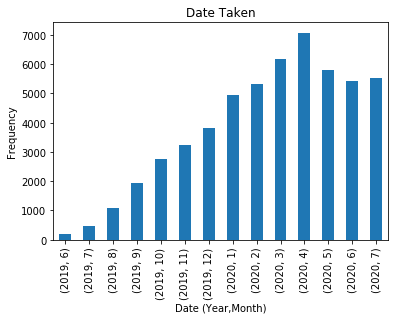

In [42]:
fig = df.groupby([df["date"].dt.year, df["date"].dt.month]).date.count().plot(kind="bar",title="Date Taken")
fig.set_xlabel("Date (Year,Month)")
fig.set_ylabel("Frequency")
plt.show()

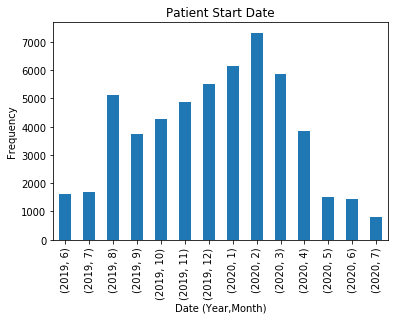

In [46]:
fig = df.groupby([df["patient_date_created"].dt.year, df["patient_date_created"].dt.month]).patient_date_created.count().plot(kind="bar",title="Patient Start Date")
fig.set_xlabel("Date (Year,Month)")
fig.set_ylabel("Frequency")
plt.show()

Average Score: 4.784591604901486
Percentage of patients who scored at least a 10 at one point: 28.615662495161914%


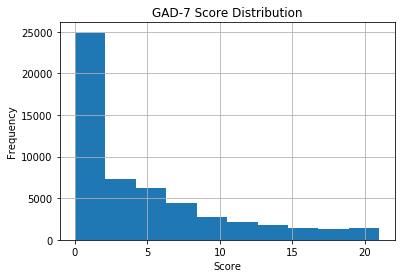

In [63]:
fig = df.hist(column="score")[0,0]
fig.set_xlabel("Score")
fig.set_ylabel("Frequency")
fig.set_title("GAD-7 Score Distribution")

print("Average Score:", df.score.mean())

unique_num_over_ten = df[df.score >= 10].patient_id.nunique()
print("Percentage of patients who scored at least a 10 at one point: {}%".format(100 * unique_num_over_ten/patient_num))


plt.show()

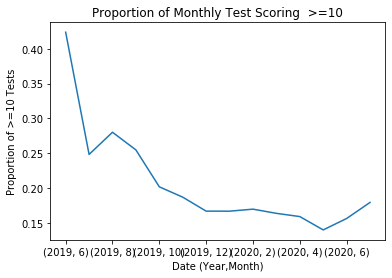

In [64]:
num_over_ten = df[df.score >= 10]
over_10_count = num_over_ten.groupby([df["date"].dt.year, df["date"].dt.month]).score.count()

total_count = df.groupby([df["date"].dt.year, df["date"].dt.month]).score.count()
fig = over_10_count.div(total_count).plot(kind="line",title="Proportion of Monthly Test Scoring  >=10")              
fig.set_xlabel("Date (Year,Month)")
fig.set_ylabel("Proportion of >=10 Tests")
plt.show()

# Observations
- The number of tests being taken each month has seen a steep upward trend from under a thousand total in June and July of 2019 to >5,000 tests each month in 2020. GAD-7 testing is certainly gaining in popularity quickly.

- There is a large spike of new patient ids being registered in the winter of 2020. Less were registered in the summers (both 2019 and 2020). It seems as though more people are more likely to seek out testing (and potentially treatment) during the winter time.

- Interestingly the percentage of tests with score >=10 (the significant threshold) has been steadily decreasing in the last year from >40% in June 2019 to <20% for every month in 2020. As the GAD-7 tests rise in popularity, it seems more and more people are taking them who do not qualify for clinical evaluation. 

# Additional Knowledge Sought

- It would be very helpful to know the breakdown of the GAD-7 test answers. This would allow for an analysis of the development of specific symptoms over time.

- It would also be very helpful to have data on any adverse events for these patients caused by GAD (or related disorders). Then the association between GAD-7 results and patient risk could be studied, and a model could be built to help flag at-risk patients.